In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/usr/local/lib/python3.8/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.8/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
neurd.set_volume_params(
    volume = "microns"
)

# Data Prep: Loading mesh

In [6]:
from mesh_tools import trimesh_utils as tu

In [7]:
segment_id = 864691135510518224

In [8]:
mesh_filepath = f"./{segment_id}.off"
mesh_filepath = '864691135510518224_small_double_soma.off'
mesh = tu.load_mesh_no_processing(mesh_filepath)
mesh

<trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>

# Step 1: Decimation

In [9]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_2_Decimation_v1.ipynb

In [10]:
decimation_kwargs = dict(
    decimation_ratio =0.25,
)

In [11]:
mesh_dec = tu.decimate(
    mesh,
    **decimation_kwargs
)

xvfb-run -n 5220 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_90331.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_90331_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25450299.mls


In [12]:
print(f"mesh = {mesh}")
print(f"mesh_dec = {mesh_dec}")

mesh = <trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>
mesh_dec = <trimesh.Trimesh(vertices.shape=(33683, 3), faces.shape=(80883, 3))>


In [13]:
ipvu.plot_objects(
    meshes = [mesh,mesh_dec],
    meshes_colors=["green","red"],
)

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 2: Some Identification

In [14]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Morphology/m65_morphology_3_MeshFragment_full_v1.ipynb

In [15]:
from neurd import soma_extraction_utils as sm
sm.output_global_parameters_nuclei()

module: neurd.soma_extraction_utils data_type set to microns, algorithms = ['nuclei']
curr_dict = {'nucleus_min': 700 (None), 'nucleus_max': None (int unsigned), }
Unknown dict_name = global_parameters_dict_microns_nuclei


{'nucleus_min': 700 (None), 'nucleus_max': None (int unsigned), }

In [16]:
mesh_dec = mesh

In [17]:
(total_soma_list, 
 run_time, 
 total_soma_list_sdf,
 glia_pieces,
 nuclei_pieces) = sm.extract_soma_center(
    segment_id,
    mesh = mesh_dec,
    return_glia_nuclei_pieces=True,
    verbose = True,
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 7260 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_36525.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_36525_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_833851.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_36525.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_36525_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_833851.mls is being deleted....
There were 16 tot

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.769893]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 377 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_801070.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_801070_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_778635.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_801070.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_801070_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_778635.mls is being deleted....
Inside sphere validater: ratio_val = 2.7266923461590085
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(1

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.781901, 0.3351845]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2079 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_924085.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_924085_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_842485.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_924085.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_924085_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_842485.mls is being deleted....
Inside sphere validater: ratio_val = 2.130721459144365
Using Poisson Surface Reconstruction for watertightness in soma

xvfb-run -n 2968 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_63236.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_63236_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_54544.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Opening a file with extention off
FilterScript
Reading filter with name Remove Duplicate Vertices
Reading filter with name Remove Faces from

removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_587826.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_587826_poisson.off
mesh.is_watertight = False
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_375125.mls is being deleted....
Inside sphere validater: ratio_val = 2.779561458917224
About to add the following inside nuclei pieces after soma backtrack: [<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <tri

  0%|          | 0/9 [00:00<?, ?it/s]

Largest hole before segmentation = 84198.44608552229, after = 79686.03659527568,

ratio = 0.9464074493053798, difference = -4512.409490246602
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 467 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_86050.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_86050_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_536595.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_86050.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_86050_fill_holes.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_536595.mls is being deleted....
xvfb-run -n 9097 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applicati

  0%|          | 0/2 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>
 <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Not need to do a second pass because already found a soma


In [18]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_extraction_meshes(
    mesh_dec,
    total_soma_list,
    glia_pieces,
    nuclei_pieces,
    verbose = True,
)

# of somas = 2
# of glia = 0
# of nuclei = 18


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 3: Decomposition

In [19]:
from neurd import neuron

In [20]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_4_Decomposition_full_v1.ipynb

In [21]:
neurd.set_volume_params(
    volume = "microns"
)

In [22]:
somas = [
 total_soma_list, 
 run_time, 
 total_soma_list_sdf,
]

picking a random 7 digit segment id: 387773
--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
soma_mesh_list_centers = [array([1488880.76058317,  589300.09373793, 1100652.31345512]), array([1472182.71408549,  577993.08644009, 1112354.27575333])]
Getting Glia and Nuclei Pieces Subtracted Away 0.11733031272888184
 Splitting mesh after soma cancellation 1.6883323192596436
# of split_meshes = 4
 Containing Mesh Indices 0.019022226333618164
containing_mesh_indices = {0: 0, 1: 0}
 non_soma_touching_meshes 7.86

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/33579 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  7.07it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3547666072845459
connecting at the root
branches_touching_root = [6]
combining close nodes
combine_threshold = 700
length of Graph = 3258
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.002908632942517017


  0%|          | 0/3 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Decomposing first pass: 2.2822093963623047
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [635, 7667]
mesh_large_connectivity: 0.0034058094024658203
Finding MAP candidates connected components: 8.821487426757812e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.07660818099975586
Grouping MP Sublimbs by Graph: 0.036444664001464844
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.002641916275024414
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5584 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poi

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02259206771850586
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.573041439056396
Checking connected components after removing cycles
Total time for mesh KDTree = 0.0883035659790039
sbv[0].reshape(-1,3) = [[1487208.   596715.8 1099876. ]]
closest_sk_pt_coord BEFORE = [1487540.  596980. 1100610.]
current_skeleton.shape = (301, 2, 3)
node_for_stitch = 214: [1487540.  596980. 1100610.]
node_for_stitch AFTER = 214: [1487540.  596980. 1100610.]
possible_node_loc = [  0  47 214 301]
possible_node_loc AFTER = [  0  47 214 301]
curr_shortest_path = [214]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1487540.  596980. 1100610.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1487540.,  596980., 110061

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (279, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 9.932640075683594
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5759 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_2880.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_2880_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_809222.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_2880.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_28

0it [00:00, ?it/s]

Total time for decomposition = 1.6275634765625
mesh_correspondence_first_pass: 1.6275897026062012
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (279, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (279, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1487593350999759
 conflict_indices % = 0.025656468320886534


  0%|          | 0/15 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 11.950562477111816
correspondence_1_to_1: 0.38771510124206543
Total time for MAP sublimb processing 11.95064640045166
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01701807975769043
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023882150650024414
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.023922204971313477
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1491450.08344721  608267.60149996 1098228.13300974]
MP_branches_with_stitch_point = [0, 1]
MAP_branch

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17350303350039567
 conflict_indices % = 0.01078211553679768


  0%|          | 0/100 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1476472.93997195  615033.74821465 1108138.04148317]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19590834697217677
 conflict_indices % = 0.004091653027823241


  0%|          | 0/10 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.1889332003988036
 conflict_indices % = 0.04719175805915587


  0%|          | 0/58 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1488771.89112037  605282.82224157 1100475.99894991]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16718266253869968
 conflict_indices % = 0.00804953560371517


  0%|          | 0/5 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23393316195372751
 conflict_indices % = 0.014441252079237864


  0%|          | 0/30 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 24.671433687210083
Number of matching vertices = 26
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1487540.  596980. 1100610.]]
Number of end_nodes BEFORE filtering = 7
all_single_nodes_to_eliminate = [4]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/10 [00:00<?, ?it/s]

66697 66698
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/10 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1484150.   588282.7 1095391. ]
Time for preparing soma vertices and root: 0.00018095970153808594
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20269 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.15it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5333843231201172
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5975
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 25
empty_indices % = 0.0
 conflict_indices % = 0.010165121237665492


  0%|          | 0/11 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Decomposing first pass: 3.109632730484009
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.528594970703125e-05
Total time for MAP sublimb processing 4.291534423828125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.621246337890625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.05478405952453613
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1483982.08022895  588135.81137922 1094821.63000965]
current_skeleton.shape = (556, 2, 3)
node_for_stitch = 556: [1483982.08022895  588135.81137922 1094821.63000965]
node_for_stitch AFTER = 556: [1483982.08022895  588135.81137922 1094821.63000965]
possible_node_loc = [  2 556]
possible_node_loc AFTER = [  2 556]
curr_shortest_path = [556]
Current stitch point was a branch or endpoint

  0%|          | 0/25 [00:00<?, ?it/s]

40338 40339
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/25 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1476534.   581771.6 1109552. ]
Time for preparing soma vertices and root: 0.00016260147094726562
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20030 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 10.86it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.32044291496276855
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 2074
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002637462007987742


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.5172100067138672
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2094]
mesh_large_connectivity: 0.00011181831359863281
Finding MAP candidates connected components: 5.817413330078125e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0532841682434082
Grouping MP Sublimbs by Graph: 0.0230865478515625
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0121612548828125
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9700 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poisson_145

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.019257545471191406
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.478742361068726
Checking connected components after removing cycles
Total time for mesh KDTree = 0.026270627975463867
sbv[0].reshape(-1,3) = [[1476534.   581771.6 1109552. ]]
closest_sk_pt_coord BEFORE = [1476730.  582461. 1109380.]
current_skeleton.shape = (77, 2, 3)
node_for_stitch = 0: [1476730.  582461. 1109380.]
node_for_stitch AFTER = 0: [1476730.  582461. 1109380.]
possible_node_loc = [ 0 77]
possible_node_loc AFTER = [ 0 77]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1476730.  582461. 1109380.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1476730.,  582461., 1109380.]])}
    Total time fo

0it [00:00, ?it/s]

Total time for decomposition = 1.024651050567627
mesh_correspondence_first_pass: 1.0246858596801758
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (77, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (77, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1451766953199618
 conflict_indices % = 0.0


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 8.890952587127686
correspondence_1_to_1: 0.18268728256225586
Total time for MAP sublimb processing 8.891036033630371
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02163076400756836
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1481900.72163354  586937.6302398  1100472.34094648]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.22795207354751199
 conflict_indices % = 0.009319032428223356


  0%|          | 0/142 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 17.569705724716187
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1476730.  582461. 1109380.]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

39810 39811
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1474851.   571357.5 1113536. ]
Time for preparing soma vertices and root: 0.0001685619354248047
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11304 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 13.75it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.23508906364440918
connecting at the root
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 1216
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0026850443032310034


  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.1200823783874512
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.337860107421875e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6226043701171875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.13026094436645508
sbv[0].reshape(-1,3) = [[1474851.   571357.5 1113536. ]]
closest_sk_pt_coord BEFORE = [1478327.0746533   571496.39513115 1112568.79431172]
current_skeleton.shape = (816, 2, 3)
node_for_stitch = 79: [1478327.0746533   571496.39513115 1112568.79431172]
node_for_stitch AFTER = 79: [1478327.0746533   571496.39513115 1112568.79431172]
possible_node_loc = [  0 816]
possible_node_loc AFTER = [  0 816]
curr_shortest_path = [79, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20506192136587711
 conflict_indices % = 0.0


  0%|          | 0/51 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 87.57318184872761
curr_width_median = 443.9026669251772
curr_width_median = 382.5094897908199
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.069399356842041
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 3.455223560333252
Number of matching vertices = 18
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1475123.88888889  571587.50555556 1113243.55555556]]
Number of end_nodes BEFORE filtering = 4
all_single_nodes_to_eliminate = [1]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

22345 22346
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1493560.   586779.1 1105606. ]
Time for preparing soma vertices and root: 0.00021457672119140625
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 14.62it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.24669313430786133
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 741
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.6079692840576172
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20742]
mesh_large_connectivity: 0.0001666545867919922
Finding MAP candidates connected components: 8.749961853027344e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.010353565216064453
Grouping MP Sublimbs by Graph: 3.0994415283203125e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.028808116912841797
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4663 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poi

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.030040740966796875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 22.557016611099243
Checking connected components after removing cycles
Total time for mesh KDTree = 0.16587090492248535
sbv[0].reshape(-1,3) = [[1493560.   586779.1 1105606. ]]
closest_sk_pt_coord BEFORE = [1492700.  587137. 1106560.]
current_skeleton.shape = (751, 2, 3)
node_for_stitch = 197: [1492700.  587137. 1106560.]
node_for_stitch AFTER = 197: [1492700.  587137. 1106560.]
possible_node_loc = [  0 126 128 152 178 197 302 412 562 574 579 608 703 717 751]
possible_node_loc AFTER = [  0 126 128 152 178 197 302 412 562 574 579 608 703 717 751]
curr_shortest_path = [197]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1492700.  587137. 1106560.]
skipping soma 0 because closest skel

  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (692, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 24.187548875808716
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1842 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_40850.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_40850_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_294554.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_40850.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 3.0083436965942383
mesh_correspondence_first_pass: 3.008396863937378
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (692, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (692, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.1681130074245492
 conflict_indices % = 0.048355992671873495


  0%|          | 0/60 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 29.121721267700195
correspondence_1_to_1: 1.8969202041625977
Total time for MAP sublimb processing 29.12179970741272
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 30.003859996795654
Number of matching vertices = 60
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1474870.  582876. 1113470.]
 [1492700.  587137. 1106560.]]
Number of end_nodes BEFORE filtering = 5
all_single_nodes_to_eliminate = [0, 2]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/7 [00:00<?, ?it/s]

20741 20742
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/7 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1486653.   594244.2 1104480. ]
Time for preparing soma vertices and root: 0.00025463104248046875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9843 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 26.61it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.17937397956848145
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 818
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.011371374130249
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.600120544433594e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.3828277587890625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.08156371116638184
sbv[0].reshape(-1,3) = [[1486653.   594244.2 1104480. ]]
closest_sk_pt_coord BEFORE = [1486547.7606223   594609.92820407 1104601.87572914]
current_skeleton.shape = (817, 2, 3)
node_for_stitch = 817: [1486547.7606223   594609.92820407 1104601.87572914]
node_for_stitch AFTER = 817: [1486547.7606223   594609.92820407 1104601.87572914]
possible_node_loc = [334 817]
possible_node_loc AFTER = [334 817]
curr_shortest_path = [817]
Current stitch point was a branch or endpoint

  0%|          | 0/1 [00:00<?, ?it/s]

19361 19362
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1491272.  582425. 1102199.]
Time for preparing soma vertices and root: 0.00023651123046875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7350 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 21.65it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1529097557067871
connecting at the root
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 734
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.413163423538208
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.910064697265625e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0265579223632812e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.06402182579040527
sbv[0].reshape(-1,3) = [[1491272.  582425. 1102199.]]
closest_sk_pt_coord BEFORE = [1491378.93502276  582020.70946596 1101822.28585048]
current_skeleton.shape = (733, 2, 3)
node_for_stitch = 1: [1491378.93502276  582020.70946596 1101822.28585048]
node_for_stitch AFTER = 1: [1491378.93502276  582020.70946596 1101822.28585048]
possible_node_loc = [  0 708]
possible_node_loc AFTER = [  0 708]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoi

  0%|          | 0/1 [00:00<?, ?it/s]

14575 14576
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1468936.   574693.8 1112623. ]
Time for preparing soma vertices and root: 0.00022530555725097656
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 44.80it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11503291130065918
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.16483497619628906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3349]
mesh_large_connectivity: 0.00018525123596191406
Finding MAP candidates connected components: 8.368492126464844e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003071308135986328
Grouping MP Sublimbs by Graph: 3.170967102050781e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.008827686309814453
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2918 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poi

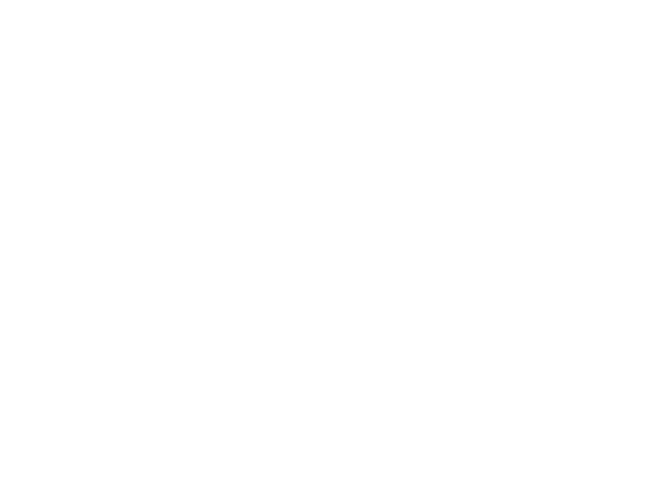

0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(2056, 3), faces.shape=(3349, 3))>]


  0%|          | 0/1 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 39.37it/s]

Time for sk_meshparty_obj = 0.09702610969543457
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [6272.94828679]
width_median= 6272.948286786781
Time for correspondence = 0.16351652145385742
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.029933691024780273
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.977221250534058
Checking connected components after removing cycles
Total time for mesh KDTree = 0.0666036605834961
sbv[0].reshape(-1,3) = [[1468936.   574693.8 1112623. ]]
closest_sk_pt_coord BEFORE = [1467110.60911576  578567.92374513 1112556.22084362]
current_skeleton.shape = (118, 2, 3)
node_for_stitch = 3: [1467110.60911576  578567.92374513 1112556.22084362]
node_for_stitch AFTER = 3: [1467110.60911576  578567.92374513 1112556.22084362]
possible_node_loc = [  0 106 117]
possible_node_loc AFTER = [  0 106 117]
curr_shortest_path = [3, 1.0, 2.0, 4.0, 6.0, 8.0, 0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 1691.8513758726172
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1467110.60911

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (117, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 11.211195230484009
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8140 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_22081.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_22081_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_260587.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_22081.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 1.1110570430755615
mesh_correspondence_first_pass: 1.1110916137695312
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (117, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (117, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3353239773066587
 conflict_indices % = 0.03254702896386981


  0%|          | 0/4 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.675058841705322
correspondence_1_to_1: 0.343966007232666
Total time for MAP sublimb processing 12.67516303062439
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.9644136428833
Number of matching vertices = 90
Only one endpoint after filtering away the endpoints that are not on the skeleton
Using Distance measure skeletal_distance
endpoints_must_keep = [[1468163.64444444  578622.88333333 1112816.05555556]]
Number of end_nodes BEFORE filtering = 3
all_single_nodes_to_eliminate = [0]
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

3348 3349
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 106.53325152397156


 ----- Working on Stitching ----------
Inside attach_floating_pieces_to_limb_correspondence
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 82.94it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.028716564178466797
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [400.49133424]
width_median= 400.49133424134044
segment_widths_median = [400.49133424]
Decomposing first pass: 0.0402679443359375
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.075599670410156e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8358230590820312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07018780708312988
Using Distance measure skeletal_distance


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12077999114990234
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 78.09it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02958083152770996
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 24
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [159.9803642]
width_median= 159.98036419871408
segment_widths_median = [159.9803642]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 78.61it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06357645988464355
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

widths = [159.96750472]
width_median= 159.9675047192734
segment_widths_median = [159.96750472]
Using the axon parameters
Decomposing first pass: 0.04464578628540039
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7894973754882812e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.193450927734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.14054012298583984
Using Distance measure skeletal_distance
no small end nodes to get rid of so returning whole skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

139 140
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2327728271484375
winning_float = 1
winning_float_match_main_limb = 1
winning_float_dist = 149.5869181909169
main_limb_stitch_point = [1454928.38848372  617422.14351492 1109437.08084759]
floating_limb_stitch_point = [1455057.   617365.2 1109488. ]
node_for_stitch = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
node_for_stitch AFTER = 1795: [1454928.38848372  617422.14351492 1109437.08084759]
possible_node_loc = [   0  136  440  586 1094 1284 1353 1466 2499 3964 4341 4358 5744 5814
 5965  577  688 1089 1114 1389 1640 1693 2508 2844 4194 5319]
possible_node_loc AFTER = [   0  136  440  577  586  688 1089 1094 1114 1284 1353 1389 1466 1640
 1693 2499 2508 2844 3964 4194 4358 5319 5744 5814 5965]
curr_shortest_path = [1795, 1784.0, 1773.0, 1761.0, 1750.0, 1733.0, 1716.0, 1702.0, 1687.0, 1678.0, 1671.0, 1664.0, 1656.0, 1649.0, 1641.0, 1636.0, 1632.0, 1627.0, 1623.0, 1596.0, 1576.0, 1566.0, 1556.0, 1548.0, 1540.0, 1530.0, 1523.0, 1515.0, 1507.0, 1499.0, 1491.0, 1484.

    current_width= 111.9796517426644
Working on limb L1 branch 3
    current_width= 95.32640663158229
Working on limb L1 branch 7
    current_width= 101.5757423393136
Working on limb L1 branch 8
    current_width= 131.75016231242103
Working on limb L1 branch 5
    current_width= 127.69894202315847
Working on limb L1 branch 6
    current_width= 108.30020672887802
Working on limb L1 branch 0
    current_width= 97.68811695225403
Working on limb L1 branch 2
    current_width= 125.98586935524001
Working on limb L1 branch 23
    current_width= 87.93425564048837
Working on limb L1 branch 24
    current_width= 82.4982383186942
Working on limb L4 branch 2
    current_width= 978.9867971450136
Working on limb L4 branch 0
    current_width= 429.0415236281284
Working on limb L4 branch 3
    current_width= 741.1121439333854
Working on limb L4 branch 1
    current_width= 289.34560756971337
Working on limb L4 branch 4
    current_width= 504.8452839197877
Working on limb L4 branch 5
    current_width= 

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 104



  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 97



  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 84



  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 186



  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 147



  0%|          | 0/147 [00:00<?, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 157



  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 114



  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 55



  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 80



  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 6
    No spines and using precomputed width: 628.1456691530273
Working on limb L0 branch 3
    current_width= 414.2423569091119
Working on limb L0 branch 7
    No spines and using precomputed width: 372.1601754035582
Working on limb L0 branch 0
    current_width= 261.67118520971894
Working on limb L0 branch 1
    current_width= 272.5726579178621
Working on limb L0 branch 2
    current_width= 288.9086657183695
Working on limb L0 branch 4
    current_width= 301.21669775687826
Working on limb L0 branch 8
    No spines and using precomputed width: 307.5266237760094
Working on limb L0 branch 5
    current_width= 244.513527739888
Working on limb L0 branch 9
    current_width= 279.4315724399992
Working on limb L1 branch 17
    current_wi

In [23]:
neuron_obj = neuron.Neuron(
    mesh = mesh,
    somas = somas,
    suppress_preprocessing_print=False,
    
    suppress_output=False,
    glia_meshes=glia_pieces,
    nuclei_meshes = nuclei_pieces,
)

In [24]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

## calculating statistics about neuron

In [25]:
from neurd.microns_volume_utils import data_interface as hdju
voxel_adjustment_vector = hdju.voxel_to_nm_scaling

stats_dict = neuron_obj.neuron_stats(stats_to_ignore = [
                    "n_boutons",
                     "axon_length",
                     "axon_area",
                     "max_soma_volume",
                     "max_soma_n_faces",],
    include_skeletal_stats = True,
    include_centroids= True,
    voxel_adjustment_vector=voxel_adjustment_vector,
)

stats_dict

Total Number of Branches = 55
n_short_branches = 12, n_medium_branches = 40, n_long_branches = 3
axon_length = 1606.564285590931, axon_branch_length_median = 16.735647518195066, axon_branch_length_mean = 29.210259738016923
bbox_volume = 1.9856852540373675
bbox_corners = [[1430458.66683036  502584.20727049 1020174.81709652]
 [1564397.98216806  659939.53090215 1114390.        ]]
bbox_corners_soma_relative = [[-58422.09375281 -86715.88646744 -80477.4963586 ]
 [ 75517.22158489  70639.43716422  13737.68654488]]


{'n_vertices': 154713,
 'n_faces': 323535,
 'max_soma_area': 341.07163148783616,
 'n_not_processed_soma_containing_meshes': 0,
 'n_error_limbs': 1,
 'n_same_soma_multi_touching_limbs': 0,
 'n_multi_soma_touching_limbs': 1,
 'n_somas': 2,
 'n_limbs': 8,
 'n_branches': 57,
 'max_limb_n_branches': 27,
 'skeletal_length': 1545041.435043754,
 'max_limb_skeletal_length': 604558.5039643556,
 'median_branch_length': 14983.573,
 'width_median': 186.744,
 'width_no_spine_median': 186.744,
 'width_90_perc': 483.345,
 'width_no_spine_90_perc': 483.345,
 'n_spines': 400,
 'spine_density': 0.00025889273318334817,
 'spines_per_branch': 7.017543859649122,
 'skeletal_length_eligible': 1023671.26,
 'n_spine_eligible_branches': 34,
 'spine_density_eligible': 0.0003907504446300466,
 'spines_per_branch_eligible': 11.765,
 'total_spine_volume': 37039347573.66675,
 'spine_volume_median': 63720671.31664276,
 'spine_volume_density': 23973.0448216865,
 'spine_volume_density_eligible': 36182.8538330428,
 'spine_

## skeleton and skeleton stats

In [26]:
skeleton = neuron_obj.skeleton

ipvu.plot_objects(
    main_skeleton=skeleton
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [27]:
from neurd import neuron_statistics as nst

sk_stats = nst.skeleton_stats_from_neuron_obj(
    neuron_obj,
    include_centroids=True,
    voxel_adjustment_vector=voxel_adjustment_vector,
    verbose = True
)

sk_stats

Total Number of Branches = 55
n_short_branches = 12, n_medium_branches = 40, n_long_branches = 3
axon_length = 1606.564285590931, axon_branch_length_median = 16.735647518195066, axon_branch_length_mean = 29.210259738016923
bbox_volume = 1.9856852540373675
bbox_corners = [[1430458.66683036  502584.20727049 1020174.81709652]
 [1564397.98216806  659939.53090215 1114390.        ]]
bbox_corners_soma_relative = [[-58422.09375281 -86715.88646744 -80477.4963586 ]
 [ 75517.22158489  70639.43716422  13737.68654488]]


{'skeletal_length': 1545041.435043754,
 'n_branches': 57,
 'branch_length_median': 16.735647518195066,
 'branch_length_mean': 29.210259738016923,
 'n_short_branches': 12,
 'n_long_branches': 3,
 'n_medium_branches': 40,
 'bbox_volume': 1.9856852540373675,
 'bbox_x_min': 1430458.6668303611,
 'bbox_y_min': 502584.2072704911,
 'bbox_z_min': 1020174.8170965186,
 'bbox_x_max': 1564397.9821680577,
 'bbox_y_max': 659939.5309021459,
 'bbox_z_max': 1114390.0,
 'bbox_x_min_soma_relative': -58422.0937528112,
 'bbox_y_min_soma_relative': -86715.88646743615,
 'bbox_z_min_soma_relative': -80477.49635860184,
 'bbox_x_max_soma_relative': 75517.22158488538,
 'bbox_y_max_soma_relative': 70639.43716421863,
 'bbox_z_max_soma_relative': 13737.686544879572,
 'n_limbs': 8,
 'centroid_x_nm': 1488880.7605831723,
 'centroid_y_nm': 589300.0937379273,
 'centroid_z_nm': 1100652.3134551204,
 'centroid_x': 372220,
 'centroid_y': 147325,
 'centroid_z': 27516,
 'centroid_volume': 440.7405976697012}

# Step 3.5

In [28]:
from neurd import neuron_utils as nru

filepath = nru.save_compressed_neuron(
    neuron_obj,
    output_folder = "./",
    file_name = f"large_double_soma",
    return_file_path = True,
)

Total time for soma meshes compression = 0.14815783500671387
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.22984623908996582
Total time for limb_meshes compression = 0.49851417541503906
    Starting Limb Correspondence Compression


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 2.6067559719085693
Total time for compression = 3.922940254211426


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/large_double_soma---


# Step 4: Split Multi-Soma Merges

In [29]:
#/mnt/lab/users/celiib/neurd_packages/neuron_mesh_tools/Auto_Proofreading/Minnie65_Pipeline/Auto_Proof/m65_autoproof_5_DecompositionSplitMultiSoma_full_v1.ipynb

In [30]:
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [31]:
plot_intermediates = True
plot_suggestions = True
plot_cut_coordinates = True
only_multi_soma_paths = False
verbose = True

multi_soma_limbs = [4]
multi_touch_limbs = []


 -------- Working on limb 4------------
Starting combinations to process = [[2 0]]


---- working on disconnecting 2 and 0
---- This disconnects S0_0 from S1_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [2, 0]
remove_segment_threshold = 1500
high_degree_endpoint_coordinates_tried = []
consider_path_neighbors_for_removal is set so segments_to_consider = [3]
Trying combining short segments with a larger threshold 2500
Short segments to combine = [3]


-------- Removing Segments -------------
curr_short_seg_revised = 3
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[1493460.  587203. 1108780.]
 [1494920.  586444. 1109910.]]
new_stitch_point = [1494190.   586823.5 1109345. ]
Angles for [2 0 1 4] are [34.19, 93.51, 89.54, 45.14]
Branch that will absorb mesh of 3 is 2 
Revised cut path = [2

  0%|          | 0/1 [00:00<?, ?it/s]

  Edge: [2 0]: curr_angle = 78.6
Total time for doubling_back = 0.035982370376586914
high_degree_endpoint_coordinates_widths = [550.5548030656607]
high_degree_order = [0]
Picking [1494190.   586823.5 1109345. ] high degree coordinates to cut
curr_limb.deleted_edges 4=[]
Inisde resolving_crossovers: debug_dict=/n{'apply_width_filter': True, 'best_match_width_diff_max': 75, 'best_match_width_diff_max_perc': 0.6, 'best_match_width_diff_min': 0.25, 'best_singular_match': True, 'lowest_angle_sum_for_pairs': False}
coordinate = [1494190.   586823.5 1109345. ]
coordinate_branches = [0, 1, 2, 4]
0 = red
1 = aqua
2 = purple
4 = green


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

edges_to_avoid= None
Angle between 0 and 1 = 160.64 
Angle between 0 and 2 = 63.32 
width_diff = 549.9452735168852, width_diff_perc = 0.5617494282054387

Angle between 0 and 4 = 61.72 
width_diff = 75.80376029165927, width_diff_perc = 0.1501524580027639

Angle between 1 and 2 = 59.52 
width_diff = 689.6411895753002, width_diff_perc = 0.7044438102602382

Not adding edge [1, 2] because width_diff= 689.6411895753002, width_diff_perc= = 0.7044438102602382
Angle between 1 and 4 = 59.93 
width_diff = 215.4996763500743, width_diff_perc = 0.42686280968470725

Angle between 2 and 4 = 60.8 
width_diff = 474.14151322522594, width_diff_perc = 0.4843185981751224

Final Matches = [[0, 2], [0, 4], [1, 4], [2, 4]]
matched_branches_revised = [[1, 4], [0, 2]]
Aligned Skeleton Parts


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Original graph


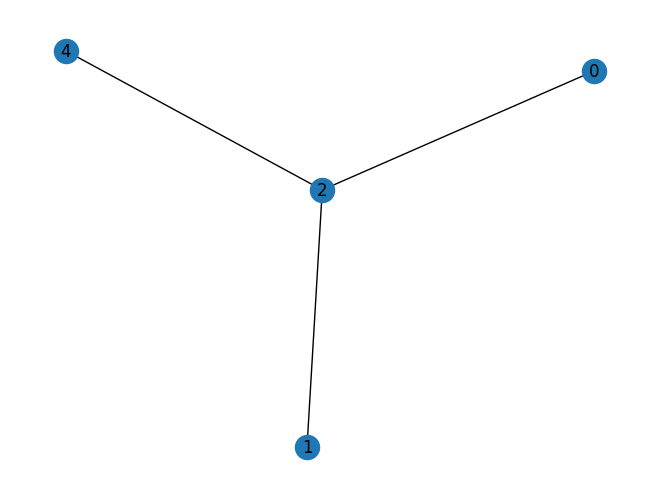

match_branches = [[1, 4], [0, 2]]
branches_to_avoid= []
1: No Pair so adding back old edge
1: Old neighbors = [2]
4: No Pair so adding back old edge
4: Old neighbors = [2]
new_neighbors = [[1, 2], [2, 4]]
edges_to_delete (resolve crossover) = [[0, 1], [0, 4]]
edges_to_create (resolve crossover) = [[1, 4], [0, 2], [1, 2], [2, 4]]
nx.number_connected_components(G) before = 1
G.edges() = [(2, 0)]
G.nodes() = [2, 0]
nx.number_connected_components(G) after = 1
NOT USING the resolve crossover delete edges because not help resolve the cut
skip_nodes = []

Attempting the doubling back check (symmetrical so don't need to check from both sides)


  0%|          | 0/1 [00:00<?, ?it/s]

  Edge: [2 0]: curr_angle = 78.6
Total time for doubling_back = 0.040357112884521484

Attempting the width jump check (ARTIFICIALLY ATTEMPTING FROM BOTH SIDES)
width_jump_threshold = 200
  Edge: [2 0]: jump = -538.08
Total time for width = 0.025675296783447266
Did not find an error edge in either of the paths
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5, 6}
Comp 1 = {3}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
--> So Setting the default_cut_edge to last
edges_to_delete (cut_limb_network) = [[2, 0]]
edges_to_create = []
edge_diff = [[2 0]]
total_soma_paths_to_cut = []


suggested_cut_points = [[1494190.   586823.5 1109345. ]]




Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


**** Computing red blue splits****
Conn comp size before expansion = [5, 1]
Not expanding to removed branches

--Doing Red/Blue splits for S0_0
error_branches=[1 2 4 5 6]
valid_upstream_branches_restriction = [0]
Error Branches = [1 2 4 5 6]

**conn_comp_errors = [[2], [1], [4, 5, 6]]
Grouping all conn comp together

**conn_comp_errors AFTER PAIRING = [[2, 1, 4, 5, 6]]
Working on connected component: [2, 1, 4, 5, 6]
Branch 2 had a valid upstream node 0 with common endpoint [[1494190.   586823.5 1109345. ]]
Branch 1 had a valid upstream node 0 with common endpoint [[1494190.   586823.5 1109345. ]]
Branch 4 had a valid upstream node 0 with common endpoint [[1494190.   586823.5 1109345. ]]
Skipping upstream node 4 because was not in valid_upstream_bra

point_array= [[1493323.85907935  587259.26818029 1109583.40795854]
 [1492537.61003949  587668.08376032 1109969.53106638]
 [1491971.50614867  587976.35314846 1110729.32549046]]
Deciding between min_cancel_distance = 966.6482222412685, and min_cancel_distance_absolute = 1000
After min: min_cancel_distance = 1000.0
red 0 node offset skeleton coordinate is [1493323.85907935  587259.26818029 1109583.40795854]
 --> using closest_mesh_face method curr_points = [[1493514.33333333  587489.6        1109755.        ]]
red 0 node offset skeleton coordinate is [1492537.61003949  587668.08376032 1109969.53106638]
 --> using closest_mesh_face method curr_points = [[1492721.   587619.6 1110417. ]]
red 0 node offset skeleton coordinate is [1491971.50614867  587976.35314846 1110729.32549046]
 --> using closest_mesh_face method curr_points = [[1491700.66666667  587848.86666667 1110594.33333333]]

For Pair 1: coordinate [[1494190.   586823.5 1109345. ]]
point_array= [[1494318.24062672  586231.7863835  111

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [32]:
(split_results,
red_blue_split_results) = pru.multi_soma_split_suggestions(
    neuron_obj,
    plot_intermediates=plot_intermediates,
    plot_suggestions=plot_suggestions,
    plot_cut_coordinates = plot_cut_coordinates,
    only_multi_soma_paths=only_multi_soma_paths,
    default_cut_edge = "last",
    verbose = verbose,
    output_red_blue_suggestions = True,
    split_red_blue_by_common_upstream = True,
    apply_valid_upstream_branches_restriction = True,
    debug_red_blue = False,
)

In [33]:
from neurd import soma_splitting_utils as ssu
ssu.plot_red_blue_split_suggestions_per_limb(
    neuron_obj,
    red_blue_split_results,
    
)



-------- Suggestions for Limb 4------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 5: Splitting Multi-Neuron

In [34]:
import numpy as np
from neurd import soma_splitting_utils as ssu
from neurd import proofreading_utils as pru

neurd.set_volume_params(
    "microns"
)

In [35]:
n_paths_cut = pru.get_n_paths_cut(
    split_results,
    verbose = True)

n_paths_multi_soma = 1
n_paths_multi_touch = 0
n_paths_cut = 1


In [36]:
verbose = True

(neuron_list,
neuron_list_errored_limbs_area,
neuron_list_errored_limbs_skeletal_length,
neuron_list_n_multi_soma_errors,
neuron_list_n_same_soma_errors) = pru.split_neuron(neuron_obj,
    limb_results=split_results,
    verbose=verbose,
    return_error_info=True,
)

multiplicity = len(neuron_list)

using precomputed split suggestions


---Working on Splitting Limb 4 with 3 components----


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1492700.  587137. 1106560.]---------
Starting_edge inside branches_to_conept = [[1492700.   587137.  1106560. ]
 [1494190.   586823.5 1109345. ]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [1]
printing out current edge:
[[1492700.   587137.  1106560. ]
 [1494190.   586823.5 1109345. ]]
edge_endpoints_to_process was empty so exiting loop after 5 iterations
starting_node in concept map (that should match the starting edge) = 1
Total time for branches to concept conversion = 0.029362201690673828

Done generating concept network 




----Working on seperate_graph 1----


---------Working on soma_idx = 1, soma_group_idx 0, endpt = [1474870.  582876. 1113470.]---------
Starting_edge inside branches_to_conept = [[1474870.   582876.  1113470. ]
 [14941

# Cell Typing

In [37]:
"""
Functions to be implemented in volume_utils

nuclei_from_segment_id
-> returns nucleus_ids,nucleus_centers

"""

'\nFunctions to be implemented in volume_utils\n\nnuclei_from_segment_id\n-> returns nucleus_ids,nucleus_centers\n\n'

In [38]:
verbose = True

hdju = pru.data_mod
hdju

In [39]:
split_index = 0
neuron_obj_pre_filt = neuron_list[split_index]

In [40]:
# 1) Retrieving the corresponding nucleus ids
nucleus_ids,nucleus_centers = hdju.nuclei_from_segment_id(
    segment_id,
    return_centers=True,
    return_nm=True
)

if verbose:
    if nucleus_ids is not None:
        print(f"Number of Corresponding Nuclei = {len(nucleus_ids)}")
        print(f"nucleus_ids = {nucleus_ids}")
        print(f"nucleus_centers = {nucleus_centers}")
        


In [43]:
plot_initial_neuron = True

if plot_initial_neuron:
    neuron_obj_rot = hdju.align_neuron_obj(neuron_obj_pre_filt)
    nviz.visualize_neuron(neuron_obj_rot,limb_branch_dict = "all")


 Working on visualization type: mesh
configuration_dict["limb_branch_dict"] = all
configuration_dict["limb_branch_dict"] = {'L0': 'all', 'L1': 'all', 'L2': 'all', 'L3': 'all', 'L4': 'all'}

 Working on visualization type: skeleton
configuration_dict["limb_branch_dict"] = all
configuration_dict["limb_branch_dict"] = {'L0': 'all', 'L1': 'all', 'L2': 'all', 'L3': 'all', 'L4': 'all'}


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [44]:
nviz.visualize_neuron(neuron_obj_pre_filt,limb_branch_dict = "all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [45]:
#2) Refining the width array to match sksleton coordinates if it doesn't

from neurd import branch_utils as bu

bu.refine_width_array_to_match_skeletal_coordinates(
        neuron_obj_pre_filt,
        verbose = False
)

In [46]:
from neurd import neuron_simplification as nsimp

plot_floating_end_nodes_limb_branch_dict =  False
plot_downstream_path_limb_branch = False
plot_after_simplification = True

# 3) Performs branch simplification so there should always be 2 or more child branches
neuron_obj_pre_filt_after_simp = nsimp.branching_simplification(
    neuron_obj_pre_filt,
    return_copy = True,

    #floating endpiece arguments
    plot_floating_end_nodes_limb_branch_dict = plot_floating_end_nodes_limb_branch_dict,
    plot_final_neuron_floating_endpoints = False,

    # combine path arguments
    plot_downstream_path_limb_branch = plot_downstream_path_limb_branch,
    plot_final_neuron_path = False,
    plot_after_simplification = True,
    verbose = verbose,
)



N_branches on limbs before simplification
L0: 10
L1: 27
L2: 5
L3: 1
L4: 1
--- STARTING merge_floating_end_nodes_to_parent----



---N_branches on limbs AFTER merge_floating_end_nodes_to_parent---
L0: 10 (difference of 0)
L1: 27 (difference of 0)
L2: 5 (difference of 0)
L3: 1 (difference of 0)
L4: 1 (difference of 0)



--- STARTING COMBINING BRANCHES----
jitter_segment = None
b_d.endpoints = [[1465201.13645255  644973.35231468 1076973.46519181]
 [1465639.47749826  643515.05932515 1076757.45951826]]
jitter_segment = None
b_d.endpoints = [[1453249.48354083  616028.64738608 1111904.55308479]
 [1457432.          617891.2        1107602.        ]]

---Working on limb L1, deleting [26, 25]
new_node_name_dict = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: -1, 26: -2}
Finished relabeling nodes
AFter relabeling branch names: [-2 -1  0  1  2  3  4  5  6  7  

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [47]:
# Filter away a large cluster of dendrite if requested SKIPPED

filter_low_branch_cluster_dendrite = False
plot_limb_branch_filter_away_low_branch = False

if filter_low_branch_cluster_dendrite:
    neuron_obj, filtering_info_low_branch = pru.apply_proofreading_filters_to_neuron(
        input_neuron = neuron_obj_pre_filt_after_simp,
        filter_list = [pru.low_branch_length_clusters_dendrite_filter],
        plot_limb_branch_filter_with_disconnect_effect=False,
        plot_limb_branch_filter_away=plot_limb_branch_filter_away_low_branch,
        plot_final_neuron=False,

        return_error_info=True,
        verbose=False,
        verbose_outline=verbose)
else:
    neuron_obj = neuron_obj_pre_filt_after_simp
    filtering_info_low_branch = {}

In [48]:
from neurd import neuron_utils as nru

winning_nucleus_id, nucleus_info = nru.pair_neuron_obj_to_nuclei(
    neuron_obj,
    "S0",
    nucleus_ids,
    nucleus_centers,
    nuclei_distance_threshold = 15000,
    return_matching_info = True,
    verbose=True)

if verbose:
    print(f"nucleus_info = {nucleus_info}")
    print(f"winning_nucleus_id = {winning_nucleus_id}")


nucleus_info = {'nucleus_id': None, 'nuclei_distance': None, 'n_nuclei_in_radius': None, 'n_nuclei_in_bbox': None}
winning_nucleus_id = None


In [49]:
# Getting the cell types from the database

database_cell_type_info = hdju.nuclei_classification_info_from_nucleus_id(
    winning_nucleus_id
)

database_e_i_class = database_cell_type_info[f"external_cell_type"]  

if verbose:
    print(f"database_cell_type_info = {database_cell_type_info}")
    print(f"database_e_i_class = {database_e_i_class}")

database_cell_type_info = {'external_cell_type': None, 'external_cell_type_n_nuc': None, 'external_cell_type_fine': None, 'external_cell_type_fine_n_nuc': None, 'external_cell_type_fine_e_i': None}
database_e_i_class = None


In [50]:
# Adding the synapses to the cell
plot_synapses = True


neurd.set_volume_params(
    "microns"
)

from neurd import synapse_utils as syu
from neurd.microns_volume_utils import data_interface as hdju
hdju.set_synapse_filepath(synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv')

neuron_obj = syu.add_synapses_to_neuron_obj(
    neuron_obj,
    segment_id = segment_id,
    #synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv',
    validation = False,
    verbose  = verbose,
    original_mesh = mesh_dec,
    plot_valid_error_synapses = False,
    calculate_synapse_soma_distance = False,
    add_valid_synapses = True,
    add_error_synapses=False,
)

if plot_synapses:
    syu.plot_synapses(neuron_obj)


---Step 1: Computing synapse_dict---
# of presyn: 62
# of postsyn: 903

---Step 2: Computing mesh_label_dict---
-- Working on presyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 3
# of valid_syn_idx = 59
-- Working on postsyn--
Using original_mesh_method
# of distance_errored_syn_idx = 0
# of mesh_errored_syn_idx = 345
# of valid_syn_idx = 558

---Step 3: add_valid_synapses_to_neuron_obj---
Synapse dict: 0.001
Original Mesh: 0.1682
Closest Branch: 0.1248
Closest Skeleton Branch and distance from endpoint: 0.7577
Closest Branch: 0.0281
Closest Skeleton Branch and distance from endpoint: 3.0588
Total time for valid synapse objects = 0.006987094879150391

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [51]:
# Adding the spines
from neurd import spine_utils as spu

plot_spines = True

neuron_obj = spu.add_head_neck_shaft_spine_objs(
    neuron_obj,
    verbose = verbose
)

if plot_spines:
    spu.plot_spines_head_neck(neuron_obj)

Total time for spine filtering: 2.053518772125244
Total time for fitlering spines by size 2.0537526607513428

Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Nu


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [52]:
# calculating the cell type

from neurd import cell_type_utils as ctu

plot_spines_and_sk_filter_for_syn = False
plot_spines_and_sk_filter_for_spine = False

baylor_e_i,baylor_cell_type_info = ctu.e_i_classification_from_neuron_obj(
    neuron_obj,
    plot_on_model_map=False,
    plot_spines_and_sk_filter_for_syn = plot_spines_and_sk_filter_for_syn,
    plot_spines_and_sk_filter_for_spine = plot_spines_and_sk_filter_for_spine,
    verbose = verbose,
    return_cell_type_info = True
)

baylor_cell_type_info["baylor_cell_type"] = baylor_e_i 

if verbose:
    print(f"baylor_cell_type_info = \n{baylor_cell_type_info}")

query_postsyn_filter = (distance_from_soma<110000) and (no_spine_median_mesh_center > 140) and (no_spine_median_mesh_center < 10000) and (n_spines > -1) and skeletal_length > 5000 
About to do syn_density stats
syn_density_post = 0.8785044015715052
syn_density_head = 0.37264428509283104
syn_density_neck = 0.0054006418129395805
syn_density_shaft = 0.39784728021988247
sk_length_synapse_density = 555489.5332647683
About to do spine_density stats
query_postsyn_filter = (distance_from_soma<110000) and (no_spine_median_mesh_center > 140) and (no_spine_median_mesh_center < 520) and (n_spines > 2) and skeletal_length > 15000 
postsyn_limb_branch = {'L0': array([0, 1, 3, 4, 5, 9]), 'L2': array([4]), 'L3': array([0]), 'L4': array([0])}
sk_length = 525143.6145710262
# of spines = 256
Density = 0.4874856951447817
spine_density = 0.4874856951447817 (multiplier = 1000)
sk_length spine density = 525143.6145710262
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'ex

In [53]:
e_i_class = baylor_e_i

# Classifying axon and dendrite

In [54]:
from neurd import axon_utils as au

neurd.set_volume_params(
    "microns"
)

filter_dendrite_on_axon = False
plot_initial_axon = False
plot_axon_on_dendrite = False
plot_high_fidelity_axon = False
plot_boutons_web = False



(o_neuron_unalign,
 filtering_info,
 axon_angles_dict,
 G_axon_labeled,)=au.complete_axon_processing(
            neuron_obj,
            cell_type = e_i_class,
            add_synapses_and_head_neck_shaft_spines = False,
            validation = False,
            plot_initial_axon=plot_initial_axon,
            plot_axon_on_dendrite=plot_axon_on_dendrite,
            return_filtering_info = True,
             return_axon_angle_info = True,
            plot_high_fidelity_axon = plot_high_fidelity_axon,
            plot_boutons_web = plot_boutons_web,
            add_synapses_after_high_fidelity_axon = True,
            filter_dendrite_on_axon = filter_dendrite_on_axon,
            return_G_axon_labeled = True,
            verbose = verbose)

axon_fun = <function axon_classification_excitatory at 0x7f8f5ac8a790>
Restricting limbs to those greater than 70
Limb L0 soma angle: 170.09 
Limb L1 soma angle: 81.31 
Limb L2 soma angle: 72.91 
Limb L3 soma angle: 139.18 
Limb L4 soma angle: 20.41 

Part 0: possible_axon_limbs = [0, 1, 2, 3]
branches_without_postsyn_req query = 
skeletal_length > 10000  and ((synapse_density_offset_endpoint_upstream < 0.00015) or (n_synapses_offset_endpoint_upstream <= 2)) and (n_synapses_pre_offset_endpoint_upstream <= 1) and (width_new > 95) and (width_new < 650) and (n_synapses_spine_offset_endpoint_upstream < 3)
low_density_limb_branch = {'L1': array([ 0,  8,  9, 16, 17])}
low_density_limb_branch_within_dist = {'L1': array([16, 17])}
low_postsyn = {'L1': array([16, 17])}
L1 : limb_conn_comp = {17: [16, 17]}
# of candidates = 1
Before filtering canddiate, axon_candidates = [{'limb_idx': 'L1', 'start_node': 17, 'branches': [16, 17]}]
len(axon_candidates) = 1
axon_candidates = [{'limb_idx': 'L1', 's

100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.6486577987670898
branches_touching_root = [13]
combining close nodes
combine_threshold = 1300
length of Graph = 7906
After combining close endpoints max(kept_branches_idx) = 85, len(kept_branches_idx) = 75
empty_indices % = 0.0
 conflict_indices % = 0.028463139120095123
AFTER face_lookup_resolved_test
Decomposing first pass: 5.338494777679443
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.1205673217773438e-05
Total time for MAP sublimb processing 5.4836273193359375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.811981201171875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.047009944915771484
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1484209.07018222  5881

100%|██████████| 1/1 [00:00<00:00, 365.39it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.01965188980102539
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
AFTER face_lookup_resolved_test
Decomposing first pass: 0.03614234924316406
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.5974044799804688e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0994415283203125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.05766487121582031
Using Distance measure skeletal_distance
no small end

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12115287780761719
Floating 1: <trimesh.Trimesh(vertices.shape=(3012, 3), faces.shape=(5404, 3))>
invalidation_d = 1500
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 1150
filter_end_node_length_meshparty = 1150
invalidation_d = 1500
root_curr = None
Time for preparing soma vertices and root: 3.5762786865234375e-06
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13244223594665527
branches_touching_root = [6]
combining close nodes
combine_threshold = 1300
length of Graph = 344
After combining close endpoints max(kept_branches_idx) = 12, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.0902269743012568
AFTER face_lookup_resolved_test
Decomposing first pass: 0.37444162368774414
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.3909759521484375e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4066696166992188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5171723365783691
Using Distance measure skeletal_di

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.1273670196533203
winning_float = 0
winning_float_match_main_limb = 0
winning_float_dist = 21.0
main_limb_stitch_point = [1465674.  643860. 1076901.]
floating_limb_stitch_point = [1465674.  643881. 1076901.]
node_for_stitch = 3609: [1465674.  643860. 1076901.]
node_for_stitch AFTER = 3609: [1465674.  643860. 1076901.]
possible_node_loc = [   0   56  231  394  489  599  750  886  911  923  930 1520 1868 1916
 1970 1977 2099 2137 2186 2257 2467 2558 2570 2654 2948 3166 3249 3609
 3667 3907 4018 4333 5310 5723 5732 6499 6879 6970 7222 7513 7623 7638
 7758 7797 7841  350  845  860 1042 1233 1518 1531 1665 1739 1782 2196
 2378 2575 2655 2761 2911 3114 3620 3782 3846 3900 4086 4485 5560 6468
 6601 6896 7065 7167 7429 7447]
possible_node_loc AFTER = [   0   56  231  350  394  489  599  750  845  860  886  911  923  930
 1042 1233 1518 1520 1531 1665 1739 1782 1868 1916 1970 1977 2099 2137
 2186 2196 2257 2378 2467 2558 2570 2575 2654 2655 2761 2911 2948 3114
 3166 3249 3609 3620 3

In [55]:
nviz.plot_axon(o_neuron_unalign)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Proofreading

In [ ]:
import numpy as np
ipvu.plot_scatter(
    array=np.array([[0.12068656, 0.34903741, 0.84620654],
       [0.04812803, 0.14411268, 0.54990798],
       [0.79566505, 0.63533888, 0.03276685],
       [0.55378168, 0.25424957, 0.71898828],
       [0.1054361 , 0.70734158, 0.25456412],
       [0.51331846, 0.46793084, 0.44032635],
       [0.58216843, 0.46214255, 0.12553144],
       [0.08834693, 0.13477684, 0.88986768],
       [0.39226641, 0.96131601, 0.05423914],
       [0.86158737, 0.30404951, 0.42807901]]),
    color=(1,0,0,0.99),
    size=10,
    widgets_to_plot = ("size","marker","color"),
)

In [ ]:
size = [0.3]
color = [[1.0, 0.0, 0.0, 0.5]]
scatters = [np.array([[0.12068656, 0.34903741, 0.84620654],
       [0.04812803, 0.14411268, 0.54990798],
       [0.79566505, 0.63533888, 0.03276685],
       [0.55378168, 0.25424957, 0.71898828],
       [0.1054361 , 0.70734158, 0.25456412],
       [0.51331846, 0.46793084, 0.44032635],
       [0.58216843, 0.46214255, 0.12553144],
       [0.08834693, 0.13477684, 0.88986768],
       [0.39226641, 0.96131601, 0.05423914],
       [0.86158737, 0.30404951, 0.42807901]])]

ipvu.plot_multi_scatters(
    scatters,
    color="red",
    #size = size
)

In [ ]:
ipvu.plot_objects(
    skeletons=[np.array([[1,2,3],[4,5,6]]).reshape(-1,2,3)],
    scatters=[np.random.rand(10,3)]
)

In [ ]:
from python_tools import ipyvolume_utils as ipvu
import ipyvolume  as ipv

ipv.clear()
ipvu.plot_objects(
    scatters=[np.random.rand(10,3)],
    scatter_size=10,
    set_zoom=1,
    axis_box_off=False,
)

In [ ]:
# Proofreading

In [ ]:
len(dict_info["postsyn"]["synapse_ids"])

In [ ]:
from python_tools import pandas_utils as pu
df = syu.synapse_df_from_synapse_dict(dict_info,segment_id = segment_id)
filepath = f"{segment_id}_synapses.csv"
pu.df_to_csv(df,filepath)

In [ ]:
df

In [ ]:
df

In [ ]:
syu.synapse_dict_from_synapse_csv(
    synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv',
)

In [ ]:
synapse_ids

In [ ]:
# find the overlap in files in meshAfterParty
from pathlib import Path
from python_tools import file_utils as filu
from python_tools import pathlib_utils as plu
import numpy as np
map_files = plu.files_of_ext_type(
    "/neurd_packages/meshAfterParty/meshAfterParty/",
    ext = "py",
    return_stem = True,
)

neurd_files = plu.files_of_ext_type(
    "/neurd_packages/NEURD/neurd/",
    ext = "py",
    return_stem = True,
)

interset_files = np.intersect1d(map_files,neurd_files)
interset_files

In [ ]:
hdju_min.fetch_soma_mesh

In [ ]:
"""
Purpose: Want to move the overlapping files 
in meshAfterParty into a saved folder with a new name

Pseudocode: 
0) Create a new folder to save files in
1) cp the file from meshAfterParty to new folder (with suffix)
2) Delete the old filepath
"""
from python_tools import system_utils as su

new_folder = "/neurd_packages/meshAfterParty/meshAfterParty/neurd_moved_files"
existing_path = "/neurd_packages/meshAfterParty/meshAfterParty/"
suffix = "_neurd"
delete_old_files = True
verbose = True

Path(new_folder).mkdir(exist_ok=True)

for f in interset_files:
    curr_path = Path(existing_path) / Path(f"{f}.py")
    final_path =  Path(new_folder) / Path(f"{f}{suffix}.py")
    if curr_path.exists():
        su.copy_file(
           curr_path,
           final_path,
        )
        
        if verbose:
            print(f"Moved {curr_path}")

        if delete_old_files:
            curr_path.unlink()

In [ ]:
from os import sys
sys.path.append("/neurd_packages/meshAfterParty/meshAfterParty/")

In [ ]:
from dataInterfaceMinnie65 import data_interface as hdju_min

In [ ]:
hdju.nuclei_classification_info_from_nucleus_id(
    4078
)